# Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import mlflow
import mlflow.sklearn


In [2]:
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

# Carregando os dados

In [3]:
Train_Data = pd.read_csv('./../../Datasets/heart.csv')
Train_Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Informando dataset no mlflow
mlflow_dataset = mlflow.data.from_pandas(Train_Data, source="datasets_heart.csv", name="Heart Attack Dataset")

## Descrição das colunas

1. __Age__ is the age of candidate.
2. __Sex__ has numeric values. 1 denotes male and 0 denotes female.
3. __Chest Pain__ pain has values between 0-3. The types of angina that are described in the research paper. The higher the number, the lesser are the odds of heart attack.
4. __Resting blood pressure__ is normal pressure with no exercise.
5. __Cholesterol__ means the blockage for blood supply in the blood vessels.
6. __Fasting Blood Pressure__ is blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning. 1 denotes > 120 mg/dl 
7. __Rest ECG (electrocardiographic) results__ means ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening. Values 0,1,2.
8. __The Maximum Heart Rate achieved__.
9. __Exercise induced angina__ is chest pain while exercising or doing any physical activity. 1 denotes presence and 0 denotes absence.
10. __Oldpeak__ = ST Depression induced by exercise relative to rest. ST Depression is the difference between value of ECG at rest and after exercise.
11. __ST Slope__ is the tangent to the depression value.
12. __The number of major blood vessels (0-3) supplying blood to heart blocked__.
13. __The Types of thalassemia__.
14. __Heart attack prediction__ where 1 denotes Heart attack occured and 0 where it din't take occur.

In [5]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Checar se as classes estão balanceadas

In [6]:
Train_Data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# Checar se existem dados duplicados

In [7]:
print("Duplicated values: ", Train_Data.duplicated().sum())
duplicate = Train_Data[Train_Data.duplicated()]
duplicate

Duplicated values:  1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### Remover dados duplicados, deixando apenas a primeira ocorrência

In [8]:
Train_Data.drop_duplicates(keep='first', inplace=True) 
Train_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Checar se existem dados faltantes

In [9]:
print("Missing values: ", Train_Data.isnull().sum().sum())

Missing values:  0


# Checar se existem correlações entre os atributos e a saída

In [10]:
corr = Train_Data.corr()
corr.style.background_gradient(cmap = 'viridis')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [11]:
X=Train_Data[Train_Data.columns[Train_Data.columns!='target']]

In [12]:
Y=Train_Data['target']

## Dividir treinamento e teste

In [13]:
train_x, test_x, train_y,test_y=train_test_split(X,Y,random_state=0,test_size=0.2)
print(train_y.shape, test_y.shape)

(241,) (61,)


# Normalizando os dados

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.fit_transform(test_x)

# Visualizando normalização

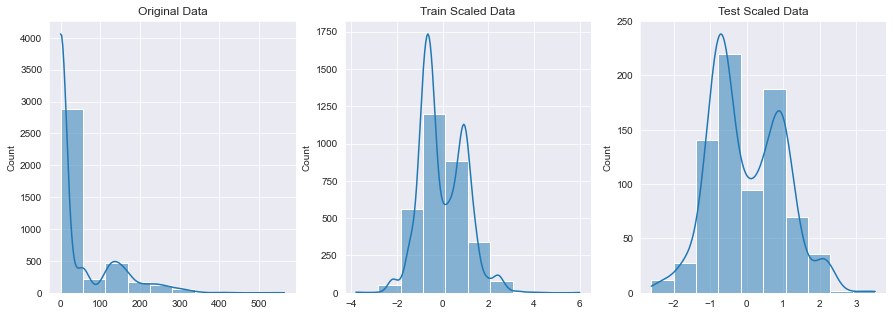

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
sns.histplot(np.concatenate(X.values), \
            ax=ax[0], bins=10, kde=True) \
                .set_title('Original Data')
sns.histplot(np.concatenate(X_train_scaled), \
            ax=ax[1], bins=10, kde=True) \
                .set_title('Train Scaled Data')
sns.histplot(np.concatenate(X_test_scaled), \
            ax=ax[2], bins=10, kde=True) \
                .set_title('Test Scaled Data')
plt.tight_layout
plt.show()

# Random Forest

In [16]:
mlflow.set_experiment("Aula_Ensemble_MLFlow")

with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "RF: " + str(datetime.now()))
    mlflow.log_input(mlflow_dataset)
    
    mlflow.log_param("n_estimators",100)
    mlflow.log_param("random_state",42)
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    model_rf.fit(X_train_scaled, train_y)
    y_pred_rf = model_rf.predict(X_test_scaled)
    
    #modelo
    mlflow.sklearn.log_model(model_rf, "Random Forest")
    acuracia = round(accuracy_score(test_y, y_pred_rf),2)
    print('Acurácia:' + str(acuracia))
    mlflow.log_metric("acuracia",acuracia)
    print(classification_report(test_y, y_pred_rf))

    cm = confusion_matrix(test_y, y_pred_rf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["bad","good"])
    disp.plot()
    plt.savefig("confusion.png")
    plt.close()

    mlflow.log_artifact("confusion.png")

mlflow.end_run()

Acurácia:0.87
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# XGBoost

In [17]:
from xgboost import XGBClassifier

In [18]:
mlflow.set_experiment("Aula_Ensemble_MLFlow")
from datetime import datetime

with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "XGB: " + str(datetime.now()))
    mlflow.set_tag("mlflow.source.type", "local")
    mlflow.set_tag("mlflow.user", "pveinberg_custom_user")
    mlflow.log_input(mlflow_dataset)

    xgb = XGBClassifier()
    xgb.fit(X_train_scaled, train_y)
    #Predizendo dados 
    y_pred = xgb.predict(X_test_scaled)
    
    #modelo
    mlflow.sklearn.log_model(xgb,"XGBoost")

    #Verificando modelo
    acuracia = round(accuracy_score(test_y, y_pred),2)
    print('Acurácia:' + str(acuracia))
    print(classification_report(test_y, y_pred))

    cm = confusion_matrix(test_y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["bad","good"])
    disp.plot()
    plt.savefig("confusion.png")
    plt.close()


    mlflow.log_artifact("confusion.png")   
    
mlflow.end_run()

Acurácia:0.82
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [19]:
feature_names = train_x.columns

In [20]:
xgb.get_booster().feature_names = list(feature_names.values)

In [21]:
xgb.get_booster().feature_names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [22]:
from xgboost import plot_importance

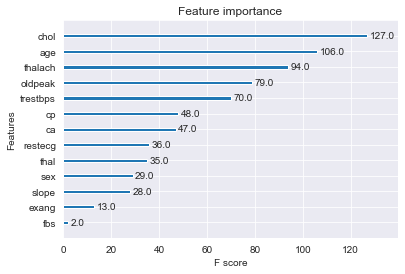

In [23]:
plot_importance(xgb)
plt.show()

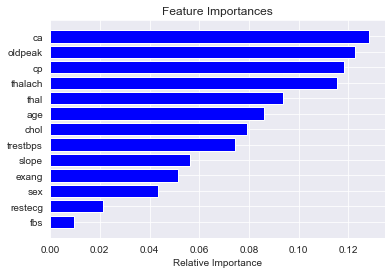

In [24]:
features = train_x.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [25]:
type(mlflow)

module